# Multigraphes orientés et pondérés par le temps

On utilisera la bibliothèque networkx comme structure de donnée adaptée pour les graphes et multigraphes orientés et pondérés.

In [1]:
import time
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from queue import PriorityQueue

**L'intégralité du code se trouve sur le présent notebook. De ce fait, générer un graphe en passant par le terminal se révèle peu pratique. Le lecteur pourra passer un fichier de son choix ci-dessous pour générer un graphe, ou passer par la génération automatique de multigraphe en spécifiant le nombre d'arcs et de sommets.**

In [2]:
file = "graphe2.txt"

Les tests de validité sont passés avec le graphe de l'exemple 2, il peut être besoin de les modifier.

## Fonctions usuelles sur les graphes

In [3]:
def createGraphFromFile(filename):
    "reads textfile and creates the corresponding directed multigraph"

    G = nx.MultiDiGraph()
    
    with open(filename, encoding='utf8') as f:
        for line in f: 
            if line[0] == 's':
                line_split = line.split(" ")
                G.add_node(str(line_split[1]))
            if line[0] == 'a':
                line_split = line.split(" ")
                u, v, t, l = line_split[2][1:-2].split(",")
                G.add_edge(u, v, date=int(t), duration=int(l))
    return G

In [4]:
MG = createGraphFromFile(file)

In [5]:
# Display agencies 
for k in MG.edges(data=True) :
    print(k)

('a', 'b', {'date': 1, 'duration': 1})
('a', 'b', {'date': 2, 'duration': 1})
('a', 'c', {'date': 4, 'duration': 1})
('a', 'f', {'date': 3, 'duration': 1})
('a', 'i', {'date': 10, 'duration': 1})
('b', 'g', {'date': 3, 'duration': 1})
('b', 'h', {'date': 3, 'duration': 1})
('c', 'h', {'date': 6, 'duration': 1})
('f', 'i', {'date': 5, 'duration': 1})
('i', 'l', {'date': 9, 'duration': 1})
('i', 'l', {'date': 8, 'duration': 1})
('g', 'j', {'date': 2, 'duration': 1})
('g', 'k', {'date': 6, 'duration': 1})
('h', 'k', {'date': 7, 'duration': 1})
('h', 'i', {'date': 7, 'duration': 1})


In [6]:
def createGraphFromMultiGraph(MG):
    G = nx.DiGraph()

    #Adding vertices
    for u, v, attribute in MG.edges(data=True):
        t = attribute["date"]
        l = attribute["duration"]
        uOut = (u, t)
        vIn = (v, t + l)
        G.add_node(uOut)
        G.add_node(vIn)
        G.add_edge(uOut, vIn, weight=l)

    # Adding 0 weighted edges
    verticesList = list(G.nodes)
    verticesList = sorted(verticesList, key=lambda item: (item[0], item[1]))
    # print(verticesList)
    for i in range(len(verticesList)-1):
        if verticesList[i][0] == verticesList[i+1][0]:
            G.add_edge(verticesList[i], (verticesList[i+1]), weight=0)
            
    return G

In [7]:
G = createGraphFromMultiGraph(MG)

In [8]:
print(G.edges(data=True))

[(('a', 1), ('b', 2), {'weight': 1}), (('a', 1), ('a', 2), {'weight': 0}), (('b', 2), ('b', 3), {'weight': 0}), (('a', 2), ('b', 3), {'weight': 1}), (('a', 2), ('a', 3), {'weight': 0}), (('b', 3), ('g', 4), {'weight': 1}), (('b', 3), ('h', 4), {'weight': 1}), (('a', 4), ('c', 5), {'weight': 1}), (('a', 4), ('a', 10), {'weight': 0}), (('c', 5), ('c', 6), {'weight': 0}), (('a', 3), ('f', 4), {'weight': 1}), (('a', 3), ('a', 4), {'weight': 0}), (('f', 4), ('f', 5), {'weight': 0}), (('a', 10), ('i', 11), {'weight': 1}), (('g', 4), ('g', 6), {'weight': 0}), (('h', 4), ('h', 7), {'weight': 0}), (('c', 6), ('h', 7), {'weight': 1}), (('h', 7), ('k', 8), {'weight': 1}), (('h', 7), ('i', 8), {'weight': 1}), (('f', 5), ('i', 6), {'weight': 1}), (('i', 6), ('i', 8), {'weight': 0}), (('i', 9), ('l', 10), {'weight': 1}), (('i', 9), ('i', 11), {'weight': 0}), (('i', 8), ('l', 9), {'weight': 1}), (('i', 8), ('i', 9), {'weight': 0}), (('l', 9), ('l', 10), {'weight': 0}), (('g', 2), ('j', 3), {'weight':

In [9]:
def createMultiGraph(vertexNumber, edgeNumber, duration):
    """generate a directed multigraph given a number of vertices 
    and probability of edge apparition and a fixed duration"""
    
    G = nx.MultiDiGraph()
    
    # Vertices
    for i in range(1, vertexNumber+1):
        G.add_node(str(i))
    if len(G.nodes()) == 1:
        return G
    # We decrease edgeNumber until we've added all the edges in the graph
    startDate = 0
    while edgeNumber > 0: 
        for i in range(1, vertexNumber+1):
            depDate = startDate+1
            for j in range(i+1, i+3):
                if edgeNumber <= 0: 
                    return G
                if str(j) not in G.nodes():
                    break
                depDate+=1
                dateArr = depDate + j 
                G.add_edge(str(i), str(j), date = dateArr, duration=duration)
                edgeNumber -= 1
                
        startDate += 1
    return G

In [10]:
MGAuto = createMultiGraph(5,10,1)

In [11]:
for v in MGAuto.nodes:
    print(v)
for e in MGAuto.edges(data=True):
    print(e)

1
2
3
4
5
('1', '2', {'date': 4, 'duration': 1})
('1', '2', {'date': 5, 'duration': 1})
('1', '3', {'date': 6, 'duration': 1})
('1', '3', {'date': 7, 'duration': 1})
('2', '3', {'date': 5, 'duration': 1})
('2', '3', {'date': 6, 'duration': 1})
('2', '4', {'date': 7, 'duration': 1})
('3', '4', {'date': 6, 'duration': 1})
('3', '5', {'date': 8, 'duration': 1})
('4', '5', {'date': 7, 'duration': 1})


Pour la suite, on va devoir accéder rapidement aux sommets selon les dates de départ ou d'arrivée, on propose ici de trier la liste (on le fera une seule fois par graphe) en un dictionnaire qui regroupe les sommets de issus du même sommet de MG triés par ordre croissant:

In [12]:
def sortVertices(G):
    vertices = dict()
    for v,t in G.nodes():
        if v not in vertices:
            vertices[v] = [(v,t)]
        else:
            vertices[v].append((v,t))
    for v in vertices:
        vertices[v].sort(key=lambda x:x[1])
    return vertices

In [13]:
vertices = sortVertices(G)
print(vertices)

{'a': [('a', 1), ('a', 2), ('a', 3), ('a', 4), ('a', 10)], 'b': [('b', 2), ('b', 3)], 'c': [('c', 5), ('c', 6)], 'f': [('f', 4), ('f', 5)], 'i': [('i', 6), ('i', 8), ('i', 9), ('i', 11)], 'g': [('g', 2), ('g', 4), ('g', 6)], 'h': [('h', 4), ('h', 7)], 'l': [('l', 9), ('l', 10)], 'j': [('j', 3)], 'k': [('k', 7), ('k', 8)]}


## Algorithmes

On testera la validité de nos algorithmes sur l'instance fournie par le fichier qui correspond au multigraphe fourni dans l'énoncé et généré ci-dessus.

<div>
<img src="./graphe2.png" width="200"/>
</div>


### I Chemin d'arrivée au plus tôt

Le but est ici de chercher un chemin partant d'un des sommets de départ (par défaut, celui ayant la plus petite date de départ, il est relié à tous les autres) et le reliant au sommet d'arrivé ayant la plus petite date.
Pour éviter de parcourir plusieurs fois le graphe, on notera tous les sommets correspondant au sommet d'arrivée parcourus et on prendra le meilleur, s'il y en a au moins un.

On utilisera le parcours en profondeur pour chercher un chemin, s'il existe, entre le sommet de départ et le sommet d'arrivée.

In [14]:
def backwardBfs(G, arrival):
    reach = deque()
    reach.append(arrival)
    visited = set()
    visited.add(arrival)
    successors = dict()
    successors[arrival] = (-1,-1)
    
    while reach:
        arrival = reach.pop()
        date = arrival[1]
        for v in G.predecessors(arrival):
            if v[1] > date:
                continue
            if (v) not in visited:
                visited.add(v)
                successors[v] = arrival
                reach.append(v)
    return successors

In [15]:
def backwardBuildPath(successors, v, arrival):
    path = [v]
    a,t = successors[v]
    if a == -1:
        return ([v[0], v[0]], v[1], arrival[1])
    
    while a != arrival[0] and a != -1:
        path += [(a,t)]
        a,t = successors[(a,t)]
    path += [(a,t)]
    
    
    path = [v[0] for v in path]
    repetitions = set()
    finalPath = []
    for u in path:
        if u not in repetitions:
            repetitions.add(u)
            finalPath.append(u)
    return (finalPath, v[1], arrival[1])

In [16]:
def earliestArrivalPath(G, departure, arrival, vertices, minDate, maxDate):
    G = G.copy()
    i = 0
    if minDate > maxDate:
        return None
    if arrival not in vertices or departure not in vertices:
        return None
    while i < len(vertices[arrival]):
        arr = vertices[arrival][i]
        if arr[1] > maxDate:
            continue
        successors = backwardBfs(G, arr)
        for v in vertices[departure]:
            if v in successors and v[1] >= minDate:
                return backwardBuildPath(successors, v,arr)
        i+=1
        for v in successors:
            if v[0] != departure and v[0] != arrival:
                G.remove_node(v)
    # We found no path
    return None

In [17]:
# Test

print(earliestArrivalPath(G,'a','j', vertices, 0,10)) # expected : None
print(earliestArrivalPath(G,'a','k', vertices, 0, 10))# expected : a,b,g,k 
print(earliestArrivalPath(G,'a','k', vertices, 4, 10))# expected : a,c,h,k
print(earliestArrivalPath(G,'f','k', vertices, 1, 10))# expected : None
print(earliestArrivalPath(G,'a','a', vertices, 1, 10))# expected : a,a

None
(['a', 'b', 'g', 'k'], 1, 7)
(['a', 'c', 'h', 'k'], 4, 8)
None
(['a', 'a'], 1, 1)


Les résultats se lisent de la façon suivante :  
* Le chemin d'arrivée au plus tôt de 1 à 2 commence à la date 1, finit à la date 2, a donc une durée 1 et une distance de 1 
* Le chemin d'arrivée au plus tôt de 1 à 4 commence à la date 1, finit à la date 6, a une durée de 5 et a une distance de 3. 
* Si il n'existe pas de chemin, la fonction renvoie `None`

### II Chemin de départ au plus tard

On prend le dernier sommet de départ, et on parcours le graphe :
Soit on trouve un des sommets d'arrivée avant la date limite
Soit on régresse dans les sommets de départs et on recommence

In [18]:
def bfs(G, departure):
    reach = deque()
    reach.append(departure)
    visited = set()
    visited.add(departure)
    predecessors = dict()
    predecessors[departure] = (-1,-1)
    
    while reach:
        departure = reach.pop()
        date = departure[1]
        for v in G.successors(departure):
            if v[1] <= date:
                continue
            if (v) not in visited:
                visited.add(v)
                predecessors[v] = departure
                reach.append(v)
    return predecessors

In [19]:
def buildPath(predecessors, v, dep):
    path = [v]
    a,t = predecessors[v]
    if a == -1:
        return ([dep[0], dep[0]], dep[1], v[1])
    
    while a != dep[0] and a != -1:
        path = [(a,t)] + path
        a,t = predecessors[(a,t)]
    path = [(a,t)] + path
    
    path = [v[0] for v in path]
    repetitions = set()
    finalPath = []
    for u in path:
        if u not in repetitions:
            repetitions.add(u)
            finalPath.append(u)
    
    return (finalPath, dep[1], v[1])

In [20]:
def latestDeparturePath(G, departure, arrival, vertices, minDate, maxDate):
    G = G.copy()
    if minDate > maxDate:
        return None
    if arrival not in vertices or departure not in vertices:
        return None
    i = 1
    while i <= len(vertices[departure]):
        dep = vertices[departure][-i]
        if dep[1] < minDate:
            continue
        predecessors = bfs(G, dep)
        for v in vertices[arrival]:
            
            if v in predecessors and v[1] < maxDate:
                return buildPath(predecessors, v, dep)
        for v in predecessors:
            if v[0] != departure and v[0] != arrival:
                G.remove_node(v)
            
        i+=1
    # We found no path
    return None

In [21]:
# Test
print(latestDeparturePath(G,'a','b',vertices,1,10)) # expected a,b,2 
print(latestDeparturePath(G,'a','i',vertices,1,12)) # expected a,i
print(latestDeparturePath(G,'a','i',vertices,1,10)) # expected a,c,h,i
print(latestDeparturePath(G,'a','i',vertices,1,8))  # expected a,f,i
print(latestDeparturePath(G,'a','a',vertices,1,7))  # expected a,a

(['a', 'b'], 2, 3)
(['a', 'i'], 10, 11)
(['a', 'c', 'h', 'i'], 4, 8)
(['a', 'f', 'i'], 3, 6)
(['a', 'a'], 4, 4)


### III Chemin le plus rapide

Par définition, le chemin le plus rapide est une combinaison de contraintes des deux chemins précédents. On construit pour aller vite la liste triée par ordre croissant des couples de sommets de départ et d'arrivée selon la durée qui les sépare. 

In [22]:
def shortestPathVertices(G, departure, arrival, minDate, maxDate):
    "returns a sorted list of best couples of vertices for shortest path"
    verticesCouples = []
    for v,t in G.nodes():
        if v == departure and t >= minDate:
            for u,d in G.nodes():
                if u == arrival and d <= maxDate and d-t >= 0:
                    verticesCouples.append(((v,t), (u,d), d-t))
    verticesCouples.sort(key=lambda x:x[-1])
    return verticesCouples

In [23]:
def fastestPath(G, departure, arrival, minDate, maxDate):
    G = G.copy()
    verticesCouples = shortestPathVertices(G, departure, arrival, minDate, maxDate)
    for v,u,d in verticesCouples:   
        predecessors = bfs(G, v)
        if u in predecessors:
            path = buildPath(predecessors, u, v)
            if path != None:
                return path
    # We found no path
    return None

In [24]:
print(fastestPath(G,'a','h',1,10)) # expected a,b,h
print(fastestPath(G,'a','i',1,12)) # expected a,i
print(fastestPath(G,'a','h',4,10)) # expected a,c,h

(['a', 'b', 'h'], 2, 4)
(['a', 'i'], 10, 11)
(['a', 'c', 'h'], 4, 7)


### IV Plus court chemin
*On utilise Dijkstra*

In [25]:
def buildPathDijkstra(path):
    limit = len(path)
    for i in range(1, len(path)):
        if path[-i][0] == path[-(i+1)][0]:
            limit -= 1
        else:
            break
    
    repetitions = set()
    finalPath = []
    for u in path:
        if u[0] not in repetitions:
            repetitions.add(u[0])
            finalPath.append(u[0])
            
    return (finalPath, path[0][1], path[limit-1][1])

In [26]:
def shortestPath(G, departure, arrival, vertices, minDate, maxDate):
    
    
    dep = (-1,-1)
    arr = (-1,-1)
    # Get the proper departure and arrival vertices in G
    if arrival not in vertices or departure not in vertices:
        return None
    for v in vertices[departure]:
        if v[1] >= minDate:
            dep = v
            break
    for u in vertices[arrival]:
        if u[1] <= maxDate and u[1] >= arr[1]:
            arr = u
    
    if dep[0] == -1 or arr[0] == -1:
            return None
 
    v1,d1 = dep
    v2,d2 = arr
    if v1 == v2:
        return (buildPathDijkstra([dep]))

    # BFS with priority Queue
    dist = dict()
    q = PriorityQueue()
    q.put(dep)
    for i in G.nodes():
        dist[i] = (float("Inf"), -1)
    dist[dep] = (0,-1)
    
    while not q.empty():
        vertex = q.get()
        for successor in G.successors(vertex):
            if successor[1] <= vertex[1]:
                continue
            if dist[successor][0] > dist[vertex][0]:
                if successor[0] != vertex[0]:
                    dist[successor] = (dist[vertex][0]+1, vertex)
                else:
                    dist[successor] = (dist[vertex][0], vertex)
                q.put(successor)
    
    #print(dist)
    d,p = dist[arr]
    if d == float("Inf"):
        return None

    # Get path
    v = arr
    path = [v]
    while v != dep:
        d, p = dist[v] 
        path = [p] + path
        v = p
        
    return buildPathDijkstra(path)

In [27]:
# Tests
print(shortestPath(G, 'a', 'i', vertices, 0, 12)) # expected a,i
print(shortestPath(G, 'a', 'i', vertices, 0, 7))  # expected a,f,i
print(shortestPath(G, 'a', 'j', vertices, 0, 10)) # expected None
print(shortestPath(G, 'a', 'a', vertices, 0, 10)) # expected a

(['a', 'i'], 1, 11)
(['a', 'f', 'i'], 1, 6)
None
(['a'], 1, 1)


## Tests

##### Temps d'exécution en fonction du nombre de sommets

On souhaite conserver la proportion sommet-arc dans le graphe. Pour tout graphe à $n$ sommets, on aura (arbitrairement) $2n$ arcs. 
Et pour $n$ s'incrémentant, on crée un multigraphe et on applique les quatre algorithmes pour obtenir leur temps d'exécution. 

In [28]:
# Function for testing execution time of a list of algos in terms of number of vertices
def test_nbVertices(list_algos, duration=1, repeat=50, max_nb_vertices=100, minDate=0, maxDate=float("Inf")):
    nb_algos = len(list_algos) 
    resultTime = np.zeros((nb_algos, max_nb_vertices))
    nb_vertices = np.zeros(max_nb_vertices)

    for j in range(repeat):
        for i in range(1, max_nb_vertices+1, 1):
            nb_vertices[i-1] = i
            # MG & G generation
            MGtest = createMultiGraph(i, 2*i, duration)
            Gtest = createGraphFromMultiGraph(MGtest) 

            # Algorithms
            t0 = time.time()
            sortedVertices = sortVertices(Gtest)
            sortingTime = time.time() - t0

            if sortedVertices == {}:
                continue

            # Recording the results
            for k in range(nb_algos):
                t = time.time()
                if list_algos[k].__name__ == "fastestPath":
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(i-1)][0][0], minDate, maxDate)
                    resultTime[k, i-1] += time.time() - t + sortingTime
                elif list_algos[k].__name__ != "shortestPathLP" and "MG" not in list_algos[k].__name__:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(i-1)][0][0], sortedVertices, minDate, maxDate)
                    resultTime[k, i-1] += time.time() - t + sortingTime
                elif "MG" in list_algos[k].__name__:
                    list_algos[k](MGtest, sortedVertices['1'][0][0], sortedVertices[str(i-1)][0][0], minDate, maxDate)
                    resultTime[k, i-1] += time.time() - t
                else:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(i-1)][0][0])
                    resultTime[k, i-1] += time.time() - t
    

    return resultTime / repeat, nb_vertices

In [29]:
# Recording the results
resultTime, verticeNumber = test_nbVertices([earliestArrivalPath, latestDeparturePath, fastestPath, shortestPath])
resultTime1, resultTime2, resultTime3, resultTime4 = resultTime[0, :], resultTime[1, :], resultTime[2, :], resultTime[3, :]

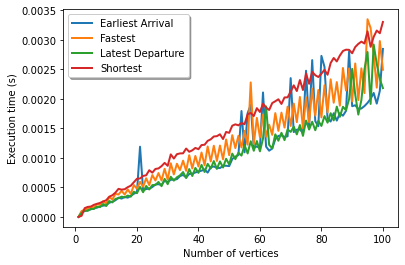

In [30]:
# Display results
fig, ax = plt.subplots()
l1 = ax.plot(verticeNumber, resultTime1, linewidth=2.0, label='Earliest Arrival')
l3 = ax.plot(verticeNumber, resultTime3, linewidth=2.0, label='Fastest')
l2 = ax.plot(verticeNumber, resultTime2, linewidth=2.0, label='Latest Departure')
l4 = ax.plot(verticeNumber, resultTime4, linewidth=2.0, label='Shortest')
legend = ax.legend(loc='upper left', shadow=True)
ax.set_xlabel("Number of vertices")
ax.set_ylabel("Execution time (s)")
plt.show()

##### Utiliser une échelle logarithmique

/tmp/ipykernel_135146/3572756117.py:2: RuntimeWarning: divide by zero encountered in log
  logres1 = np.log(resultTime1)
/tmp/ipykernel_135146/3572756117.py:3: RuntimeWarning: divide by zero encountered in log
  logres2 = np.log(resultTime2)
/tmp/ipykernel_135146/3572756117.py:4: RuntimeWarning: divide by zero encountered in log
  logres3 = np.log(resultTime3)
/tmp/ipykernel_135146/3572756117.py:5: RuntimeWarning: divide by zero encountered in log
  logres4 = np.log(resultTime4)


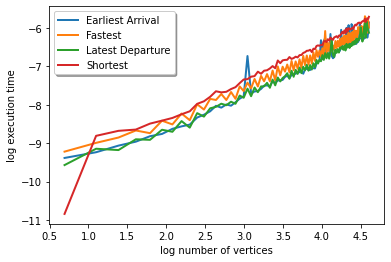

In [31]:
logvertice = np.log(verticeNumber)
logres1 = np.log(resultTime1)
logres2 = np.log(resultTime2)
logres3 = np.log(resultTime3)
logres4 = np.log(resultTime4)


fig, ax = plt.subplots()
l1 = ax.plot(logvertice, logres1, linewidth=2.0, label='Earliest Arrival')
l3 = ax.plot(logvertice, logres3, linewidth=2.0, label='Fastest')
l2 = ax.plot(logvertice, logres2, linewidth=2.0, label='Latest Departure')
l4 = ax.plot(logvertice, logres4, linewidth=2.0, label='Shortest')
legend = ax.legend(loc='upper left', shadow=True)
ax.set_xlabel("log number of vertices")
ax.set_ylabel("log execution time")
plt.show()

In [32]:
# calcul des coefficients directeurs
divisor = logvertice[-1] - logvertice[10]
print((logres1[-1] - logres1[10]) / divisor)

1.120134250780261


**Les quatre algorithmes ont une complexité linéaires**

##### Temps d'exécution en fonction du nombre d'arcs

On fixe le nombre de sommets à 50 (choix arbitraire) et on fait varier le nombre d'arcs de 50 à 200.

In [33]:
# Function for testing execution time of a list of algos in terms of number of arcs
def test_nbArcs(list_algos, repeat=100, nb_vertices=20, duration=1, minDate=0, maxDate=float("Inf")):
    nb_algos = len(list_algos)

    # We need 2*n edges to make sure the last vertex is reached
    maxE = 6 * nb_vertices
    minE = 2 * nb_vertices
    size = maxE - minE + 1
    
    resultTime = np.zeros((nb_algos, size))
    nb_arcs = np.zeros(size)

    for j in range(repeat):
        for i in range(minE,maxE+1,1):
            nb_arcs[i-minE] = i  
            # MG & G generation
            MGtest = createMultiGraph(nb_vertices, i, duration)
            Gtest = createGraphFromMultiGraph(MGtest) 
            nodes = list(MGtest.nodes())
            # Algorithms
            t0 = time.time()
            sortedVertices = sortVertices(Gtest)
            sortingTime = time.time() - t0

            if sortedVertices == {}:
                continue

            for k in range(nb_algos):
                t = time.time()
                if list_algos[k].__name__ == "fastestPath":
                    list_algos[k](Gtest, sortedVertices['1'][0][0], nodes[nb_vertices - 1], minDate, maxDate)
                    resultTime[k, i-minE] += time.time() - t + sortingTime
                elif list_algos[k].__name__ != "shortestPathLP" and "MG" not in list_algos[k].__name__:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], nodes[nb_vertices - 1], sortedVertices, minDate, maxDate)
                    resultTime[k, i-minE] += time.time() - t + sortingTime
                elif "MG" in list_algos[k].__name__:
                    list_algos[k](MGtest, sortedVertices['1'][0][0], nodes[nb_vertices - 1], minDate, maxDate)
                    resultTime[k, i-minE] += time.time() - t
                else:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], nodes[nb_vertices - 1])
                    resultTime[k, i-minE] += time.time() - t

    return resultTime / repeat, nb_arcs

In [34]:
# Recording the results
resultTime, nb_arcs = test_nbArcs([earliestArrivalPath, latestDeparturePath, fastestPath, shortestPath])
resultTime1, resultTime2, resultTime3, resultTime4 = resultTime[0, :], resultTime[1, :], resultTime[2, :], resultTime[3, :]

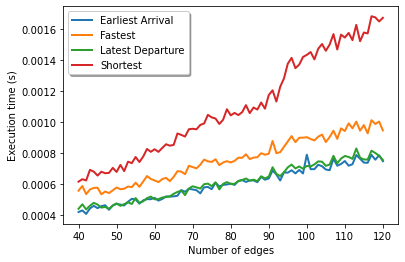

In [35]:
# Display results
fig, ax = plt.subplots()
l1 = ax.plot(nb_arcs, resultTime1, linewidth=2.0, label='Earliest Arrival')
l3 = ax.plot(nb_arcs, resultTime3, linewidth=2.0, label='Fastest')
l2 = ax.plot(nb_arcs, resultTime2, linewidth=2.0, label='Latest Departure')
l4 = ax.plot(nb_arcs, resultTime4, linewidth=2.0, label='Shortest')
legend = ax.legend(loc='upper left', shadow=True)
ax.set_xlabel("Number of edges")
ax.set_ylabel("Execution time (s)")
plt.show()

##### Temps d'exécution en fonction de la durée des trajets

Théoriquement, la durée des trajets n'influe pas sur la complexité de nos quatre algorithmes.

In [36]:
# Function for testing execution time of a list of algos in terms of duration of flight
def test_duration(list_algos, repeat=100, nb_vertices=20, max_duration=20, minDate=0, maxDate=float("Inf")):
    nb_algos = len(list_algos)
    # We need 2*nb_vertices edges to make sure that the last vertices is reachable
    nb_edges = 2 * nb_vertices

    resultTime = np.zeros((nb_algos, max_duration + 1))
    duration = np.zeros(max_duration + 1)

    for j in range(repeat):
        for i in range(5, max_duration + 6, 1):
            duration[i-5] = i
            # MG & G generation
            MGtest = createMultiGraph(nb_vertices, nb_edges, i)
            Gtest = createGraphFromMultiGraph(MGtest) 

            t0 = time.time()
            sortedVertices = sortVertices(Gtest)
            sortingTime = time.time() - t0

            if sortedVertices == {}:
                continue

            for k in range(nb_algos):
                t = time.time()
                if list_algos[k].__name__ == "fastestPath":
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(nb_vertices - 1)][0][0], minDate, maxDate)
                    resultTime[k, i-5] += time.time() - t + sortingTime
                elif list_algos[k].__name__ != "shortestPathLP" and "MG" not in list_algos[k].__name__:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(nb_vertices - 1)][0][0], sortedVertices, minDate, maxDate)
                    resultTime[k, i-5] += time.time() - t + sortingTime
                elif "MG" in list_algos[k].__name__:
                    list_algos[k](MGtest, sortedVertices['1'][0][0], sortedVertices[str(nb_vertices - 1)][0][0])
                    resultTime[k, i-5] += time.time() - t
                else:
                    list_algos[k](Gtest, sortedVertices['1'][0][0], sortedVertices[str(nb_vertices - 1)][0][0])
                    resultTime[k, i-5] += time.time() - t

    return resultTime / repeat, duration

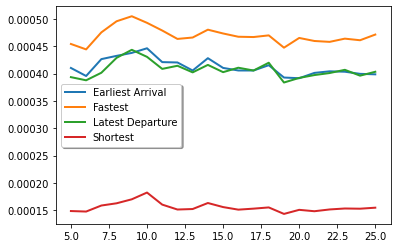

In [37]:
# Recording the results
resultTime, duration = test_duration([earliestArrivalPath, latestDeparturePath, fastestPath, shortestPath])
resultTime1, resultTime2, resultTime3, resultTime4 = resultTime[0, :], resultTime[1, :], resultTime[2, :], resultTime[3, :]
# Display results
fig, ax = plt.subplots()
l1 = ax.plot(duration, resultTime1, linewidth=2.0, label='Earliest Arrival')
l3 = ax.plot(duration, resultTime3, linewidth=2.0, label='Fastest')
l2 = ax.plot(duration, resultTime2, linewidth=2.0, label='Latest Departure')
l4 = ax.plot(duration, resultTime4, linewidth=2.0, label='Shortest')
legend = ax.legend(loc='center left', shadow=True)
plt.show()

## Chercher le plus court chemin par progammation linéaire en faisant appel à Gurobi

#### Implantation

In [38]:
import gurobipy as gp

def shortestPathLP(G, departure, arrival, alpha=0, omega=float("Inf")):
    # gurobi model
    with gp.Env(empty=True) as env:
        # Remove gurobi output log
        env.setParam('OutputFlag', 0)
        env.start()
        with gp.Model(env=env) as m:
            list_edges = list(G.edges(data=True))
            nb_edge = len(list_edges)
            
            # decision variables
            x = []
            for i in range(len(list_edges)):
                x.append(m.addVar(vtype=gp.GRB.BINARY, lb=0, name=f"x{i}"))
            
            # update model
            m.update()

            # define objectif function
            obj_func = gp.LinExpr()
            obj_func = 0
            for i in range(len(list_edges)):
                obj_func += list_edges[i][2]["weight"] * x[i]

            m.setObjective(obj_func, gp.GRB.MINIMIZE)

            # define constraints
            for node in G.nodes():
                # Number of edge in = number of edge out 
                if node[0] != departure and node[0] != arrival:
                    in_edge_index = [i for i in range(nb_edge) if list_edges[i][1] == node]
                    out_edge_index = [i for i in range(nb_edge) if list_edges[i][0] == node]
                    m.addConstr(gp.quicksum(x[i] for i in in_edge_index) - gp.quicksum(x[i] for i in out_edge_index) == 0, f"Constraint for node {node}")
                # No edge enter departure node, no edge get out departure node before alpha
                elif node[0] == departure:
                    in_edge_index = [i for i in range(nb_edge) if list_edges[i][1] == node]
                    out_edge_before_alpha_index = [i for i in range(nb_edge) if list_edges[i][0] == node and node[1] < alpha]
                    edge_index = in_edge_index + out_edge_before_alpha_index
                    if edge_index:
                        m.addConstrs((x[i] == 0 for i in in_edge_index + out_edge_before_alpha_index), f"Constraint for node {node}")
                # No edge get out arrival node, no edge enter arrival node after omega
                elif node[0] == arrival:
                    out_edge_index = [i for i in range(nb_edge) if list_edges[i][0] == node]
                    in_edge_after_omega_index = [i for i in range(nb_edge) if list_edges[i][1] == node and node[1] > omega]
                    edge_index = out_edge_index + in_edge_after_omega_index
                    # print(edge_index)
                    if edge_index:
                        m.addConstrs((x[i] == 0 for i in edge_index), f"Constraint for node {node}")

            # No edge between departure node
            edges_between_departure_node_index = [i for i in range(nb_edge) if list_edges[i][0][0] == departure and list_edges[i][1][0] == departure]
            if edges_between_departure_node_index:
                m.addConstrs((x[i] == 0 for i in edges_between_departure_node_index), f"Constraint for departure node")

            # No edge between arrival node
            edges_between_arrival_node_index = [i for i in range(nb_edge) if list_edges[i][0][0] == arrival and list_edges[i][1][0] == arrival]
            if edges_between_arrival_node_index:
                m.addConstrs((x[i] == 0 for i in edges_between_arrival_node_index), f"Constraint for arrival node")

            # There is one edge that get out of set of departure node
            out_departure_node_index = [i for i in range(nb_edge) if list_edges[i][0][0] == departure and list_edges[i][0][1] > alpha]
            m.addConstr(gp.quicksum(x[i] for i in out_departure_node_index) == 1, f"Constraint on edge getting out of the departure node")

            # There is one edge enter set of arrival node
            in_arrival_node_index = [i for i in range(nb_edge) if list_edges[i][1][0] == arrival and list_edges[i][1][1] < omega]
            m.addConstr(gp.quicksum(x[i] for i in in_arrival_node_index) == 1, f"Constraint on edge entering arrival node")

            # Resolution
            m.optimize()
            # print(m.display())
            # Return path
            path = []
            for i in range(nb_edge):
                try:
                    if x[i].x == 1:
                        path.append(list_edges[i])
                except AttributeError:
                    return None

            return path

#### Tester sur instance de ce graph:
![graphe pour tester la méthode de chercher le plus court chemin par PL](graphe2.png)

In [39]:
G2 = createGraphFromMultiGraph(createGraphFromFile("graphe2.txt"))
# print(G2.edges(data=True))
path =  shortestPathLP(G2, "a", "l")
print(f"Plus court chemin de a vers l : {path}")

Plus court chemin de a vers l : [(('a', 3), ('f', 4), {'weight': 1}), (('f', 4), ('f', 5), {'weight': 0}), (('f', 5), ('i', 6), {'weight': 1}), (('i', 6), ('i', 8), {'weight': 0}), (('i', 8), ('l', 9), {'weight': 1})]


## Comparaison entre PL et l'algorithme implanté dans la partie précédent

#### Temps d'exécution en fonction de nombre de sommets

##### Recording the results

In [40]:
resultTime, verticeNumber = test_nbVertices([shortestPath, shortestPathLP])
resultTimeAlgo, resultTimeLP = resultTime[0, :], resultTime[1, :]

##### Plotting the curves


In [41]:
def plot_comparaison(x, y, xtitle, ytitle="Execution time", labels=["Our algorithm", "Linear Programming"], title="Comparison between LP and our algorithm"):
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i])

    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend()
    plt.show()

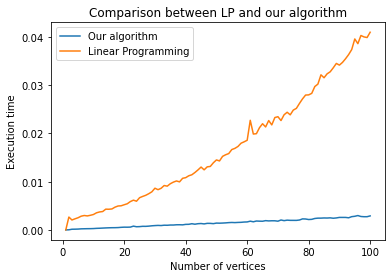

In [42]:
plot_comparaison(verticeNumber, [resultTimeAlgo, resultTimeLP], "Number of vertices", "Execution time")

##### In logarithmic scale

/tmp/ipykernel_135146/134488522.py:1: RuntimeWarning: divide by zero encountered in log
  log_resultTimeLP = np.log(resultTimeLP)
/tmp/ipykernel_135146/134488522.py:2: RuntimeWarning: divide by zero encountered in log
  log_resultTimeAlgo = np.log(resultTimeAlgo)


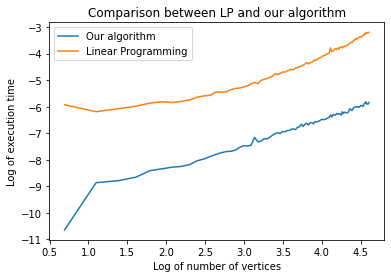

In [43]:
log_resultTimeLP = np.log(resultTimeLP)
log_resultTimeAlgo = np.log(resultTimeAlgo)
log_verticeNumber = np.log(verticeNumber)
plot_comparaison(log_verticeNumber, [log_resultTimeAlgo, log_resultTimeLP], "Log of number of vertices", ytitle="Log of execution time")


#### Temps d'exécution en fonction du nombre d'arcs

##### Enregistrer les résultats
- On fixe le nombre de sommets à 50 (choix arbitraire) et on fait varier le nombre d'arcs de 50 à 200.

In [44]:
resultTime, nb_arcs = test_nbArcs([shortestPath, shortestPathLP], repeat=20)
resultTimeAlgo, resultTimeLP = resultTime[0, :], resultTime[1, :]

##### Plotting the curves

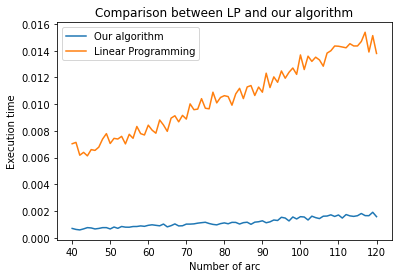

In [45]:
plot_comparaison(nb_arcs, [resultTimeAlgo, resultTimeLP], "Number of arc")

##### In logarithmic scale

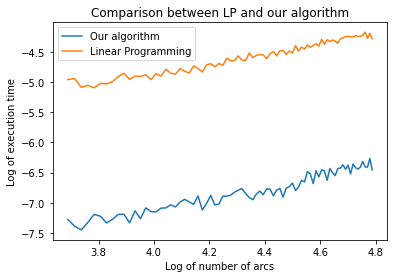

In [46]:
log_resultTimeAlgo, log_resultTimeLP, log_nb_arcs = np.log(resultTimeAlgo), np.log(resultTimeLP), np.log(nb_arcs)
plot_comparaison(log_nb_arcs, [log_resultTimeAlgo, log_resultTimeLP], "Log of number of arcs", ytitle="Log of execution time")

#### Temps d'execution en fonction de la durée des trajets

##### Recording result

In [47]:
resultTime, duration = test_duration([shortestPath, shortestPathLP])
resultTimeAlgo, resultTimeLP = resultTime[0, :], resultTime[1, :]

##### Plotting the curves

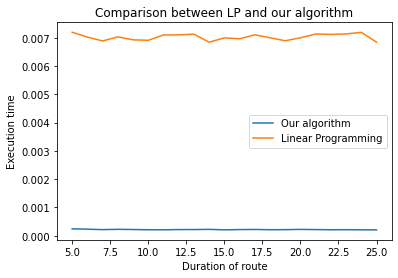

In [48]:
plot_comparaison(duration, [resultTimeAlgo, resultTimeLP], "Duration of route")

##### Similairement, la durée des trajets a aucun impact sur la complexité de notre programme linéaire

## Algorithme sur les multigraphe

In [49]:
file = "graphe2.txt"
MG = createGraphFromFile(file)

### I. Chemin d'arrivée au plus tôt
- On va utiliser Dijkstra : au lieu de mesurer la distance, on va prendre la date d'arrivée. On remontera ensuite le chemin depuis le sommet d'arrivée, s'il est atteint.

In [50]:
def earliestArrivalPathMG(MG, departure, arrival, minDate, maxDate):
    
    if arrival not in MG.nodes() or departure not in MG.nodes():
        return None
    
    if departure == arrival:
        return ([departure],0,0)
    
    arrivalDate = dict()
    for i in MG.nodes():
        arrivalDate[i] = (float("Inf"), -1) # (arrivalDate, predecessor)
    arrivalDate[departure] = (0,-1)
    departureDate = float("Inf")
    
    # Get ArrivalDates 
    for u, v, data in MG.edges(data=True):
        if u == departure:
            if data['date'] < minDate:
                continue
            if data['date'] < departureDate:
                departureDate = data['date']
        d1, p1 = arrivalDate[u]
        d2, p2 = arrivalDate[v]
        if d1 != float("Inf") and data['date'] + data['duration'] <= d2 and data['date'] >= d1:
            arrivalDate[v] = (data['date'] +data['duration'], u)
    
    
    d,p = arrivalDate[arrival]
    if d == float("Inf") or d > maxDate:
        return None
    
    # Get path
    v = arrival
    path = [v]
    while v != departure:
        d, p = arrivalDate[v] 
        path = [p] + path
        v = p
        
    return (path, departureDate, arrivalDate[arrival][0])
    
    d,p = arrivalDate[arrival]
    if d == float("Inf") or d > maxDate:
        return None
    
    # Get path
    v = arrival
    path = [v]
    while v != departure:
        d, p = arrivalDate[v] 
        path = [p] + path
        v = p
        
    return (path, departureDate, arrivalDate[arrival][0])

In [51]:
# Test
print(earliestArrivalPathMG(MG,'a','j', 0,10)) # expected : None
print(earliestArrivalPathMG(MG,'a','k', 0, 10))# expected : a,b,g,k 
print(earliestArrivalPathMG(MG,'a','k', 4, 10))# expected : a,c,h,k
print(earliestArrivalPathMG(MG,'f','k', 1, 10))# expected : None
print(earliestArrivalPathMG(MG,'a','a', 1, 10))# expected : a,a

None
(['a', 'b', 'g', 'k'], 1, 7)
(['a', 'c', 'h', 'k'], 4, 8)
None
(['a'], 0, 0)


### II. Chemin de départ au plus tard
- De même pour le chemin de départ au plus tard, cette fois, on retiendra seulement la date de départ.

In [52]:
def latestDeparturePathMG(MG, departure, arrival, minDate, maxDate):
    if arrival not in MG.nodes() or departure not in MG.nodes():
        return None
    
    if departure == arrival:
        return ([departure],0,0)
    
    dates = dict()
    
    for i in MG.nodes():
        dates[i] = (-float('Inf'), float('inf'), -1) # (departureDate, arrivalDate, predecessor)
    dates[departure] = (minDate, 0, -1)
    
    # update dates
    for u, v, data in MG.edges(data=True):
        depU, arrU, predU = dates[u]
        depV, arrV, predV = dates[v]
        if arrU != float("Inf") and depU >= depV:
            if u == departure: 
                if data['date'] < minDate:
                    continue
                depU = data['date']
            if v == arrival:
                if data['date'] + data['duration'] > maxDate:
                    continue
            dates[v] = (depU, data['date'] + data['duration'], u)
    dep, arr, pred = dates[departure]
    if dep < minDate:
        return None
    
    dep, arr, pred = dates[arrival]
    if arr == float("Inf") or arr > maxDate:
        return None
    
    # Get path
    departureDate = dates[departure][0]
    v = arrival
    path = [v]
    while v != departure:
        dep, arr, pred = dates[v] 
        path = [pred] + path
        if pred == departure:
            departureDate = dates[v][0]
        v = pred
    return (path, departureDate, dates[arrival][1])

In [53]:
# Test
print(latestDeparturePathMG(MG,'a','b',1,10)) # expected a,b,2 
print(latestDeparturePathMG(MG,'a','i',1,12)) # expected a,i
print(latestDeparturePathMG(MG,'a','i',1,10)) # expected a,c,h,i
print(latestDeparturePathMG(MG,'a','i',1,7))  # expected a,f,i
print(latestDeparturePathMG(MG,'a','a',1,7))  # expected a,a

(['a', 'b'], 2, 3)
(['a', 'i'], 10, 11)
(['a', 'c', 'h', 'i'], 4, 8)
(['a', 'f', 'i'], 3, 6)
(['a'], 0, 0)


### III. Plus rapide chemin
- On modifie un peu l'algorithme de Dijkstra pour s'adapter au multigraphe. Le principe est que l'on peut visiter un noeud plusier fois et pour chaque noeud, on garde sa date d'arrivée et pour chaque arc sortant ce noeud, on va comparer la valeur de cet arc avec la date d'arrivée du noeud afin de voir s'il est possible de le traverser ou pas. On stocke les noeuds dans une queue de priorité sur la durée de trajet

In [54]:
from collections import defaultdict

def build_fastest_path(data):
    if data is None:
        return None
    distance, before, arrival, departure = data
    possibles = [x for x in before.keys() if x[0] == arrival]

    for x in possibles:
        path = [arrival]
        count = 0
        while before[x] is not None:
            path.insert(0, before[x][0])
            count += x[1] - before[x][1]
            x = before[x]
        if count == distance:
            return path, distance

def fastestPathMG(MG, departure, arrival, minDate=0, maxDate=float("Inf")):
    # print(MG.nodes())
    q = PriorityQueue()
    before = defaultdict(lambda : None)

    q.put((0, 0, departure))

    while not q.empty():
        distance, arrival_date, current_node = q.get()
        if current_node == arrival and arrival_date <= maxDate:
            return distance, before, arrival, departure
        for next in MG.successors(current_node):
            datas = MG.get_edge_data(current_node, next)
            for data in datas.values():
                date, duration = data["date"], data["duration"]
                if current_node == departure:
                    if date >= minDate:
                        before[(next, date + duration)] = (current_node, date)
                        q.put((distance + duration, date + duration, next))
                else:
                    if date >= arrival_date:
                        if before[(next, date + duration)] is None:
                            before[(next, date + duration)] = (current_node, arrival_date)
                        else:
                            node, d = before[(next, date + duration)]
                            if date + duration - arrival_date < date + duration - d:
                                before[(next, date + duration)] = (current_node, arrival_date)
                        q.put((distance + duration + date - arrival_date, date + duration, next))

    return None

In [55]:
MG2 = createGraphFromFile("graphe2.txt")
print(build_fastest_path(fastestPathMG(MG2, "c", "l")))
print(build_fastest_path(fastestPathMG(MG2, "a", "l")))
print(build_fastest_path(fastestPathMG(MG2, "a", "i")))
print(build_fastest_path(fastestPathMG(MG2, "b", "i")))
print(build_fastest_path(fastestPathMG(MG2, "b", "k", 1, 2)))

(['c', 'h', 'i', 'l'], 3)
(['a', 'c', 'h', 'i', 'l'], 5)
(['a', 'i'], 1)
(['b', 'h', 'i'], 5)
None


### IV. Plus court chemin
- On utilise Dijkstra. Pour chaque noeud on garde sa date d'arrrivée et pour chaque arc sortant ce noeud, on va comparer sa valeur avec la date d'arrivée afin de voir s'il est possible de le traverser ou pas.

In [56]:
def build_shortest_path(data):
    if data is None:
        print("not found")
        return None
    distance, before, arrival, departure = data
    possibles = [x for x in before.keys() if x[0] == arrival]

    for x in possibles:
        path = [arrival]
        count = 0
        while before[x] is not None:
            path.insert(0, before[x][0])
            x = before[x]
            count += 1
        if count == distance:
            return path, distance

def shortestPathMG(MG, departure, arrival, minDate=0, maxDate=float("Inf")):
    q = PriorityQueue()
    before = defaultdict(lambda : None)

    q.put((0, 0, departure))

    while not q.empty():
        distance, arrival_date, current_node = q.get()
        if current_node == arrival and arrival_date <= maxDate:
            return distance, before, arrival, departure
        for next in MG.successors(current_node):
            datas = MG.get_edge_data(current_node, next)
            for data in datas.values():
                date, duration = data["date"], data["duration"]
                if current_node == departure:
                    if date >= minDate:
                        before[(next, date + duration)] = (current_node, arrival_date)
                        q.put((distance + duration, date + duration, next))
                else:
                    if date >= arrival_date:
                        before[(next, date + duration)] = (current_node, arrival_date)
                        q.put((distance + duration, date + duration, next))

    return None
    

In [57]:
# Test
print(build_shortest_path(shortestPathMG(MG2, "a", "h", 0, 0)))
print(build_shortest_path(shortestPathMG(MG2, "a", "j")))
print(build_shortest_path(shortestPathMG(MG2, "b", "k")))
print(build_shortest_path(shortestPathMG(MG2, "a", "k")))
print(build_shortest_path(shortestPathMG(MG2, "b", "l")))
print(build_shortest_path(shortestPathMG(MG, "a", "f")))
print(build_shortest_path(shortestPathMG(MG, "a", "g")))

not found
None
not found
None
(['b', 'g', 'k'], 2)
(['a', 'b', 'g', 'k'], 3)
(['b', 'h', 'i', 'l'], 3)
(['a', 'f'], 1)
(['a', 'b', 'g'], 2)


## Comparaison entre les algorithmes sur les multigraphes et sur les graphes transformés

### I Chemin d'arrivée au plus tôt
- En fonction du nombre de sommets

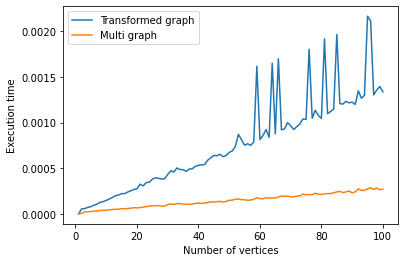

In [58]:
resultTime, nb_vertices = test_nbVertices([earliestArrivalPath, earliestArrivalPathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_vertices, [resultTimeNormal, resultTimeMulti], "Number of vertices", labels=["Transformed graph", "Multi graph"], title="")

- En fonction du nombre d'arcs

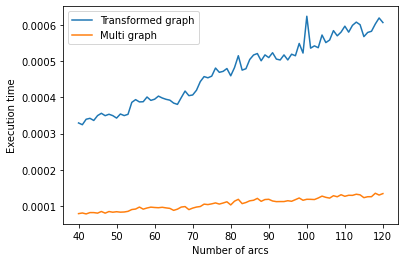

In [59]:
resultTime, nb_arcs = test_nbArcs([earliestArrivalPath, earliestArrivalPathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_arcs, [resultTimeNormal, resultTimeMulti], "Number of arcs", labels=["Transformed graph", "Multi graph"], title="")

### II Chemin de départ au plus tard
- En fonction du nombre de sommets

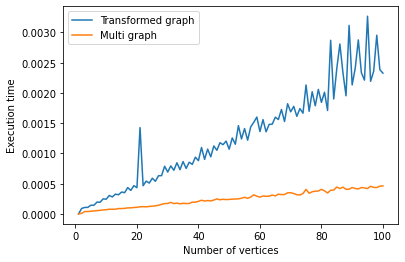

In [60]:
resultTime, nb_vertices = test_nbVertices([latestDeparturePath, latestDeparturePathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_vertices, [resultTimeNormal, resultTimeMulti], "Number of vertices", labels=["Transformed graph", "Multi graph"], title="")

- En fonction du nombre d'arcs

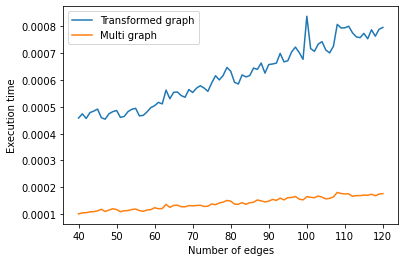

In [61]:
resultTime, nb_arcs = test_nbArcs([latestDeparturePath, latestDeparturePathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_arcs, [resultTimeNormal, resultTimeMulti], "Number of edges", labels=["Transformed graph", "Multi graph"], title="")

### III. Plus rapide chemin
- En fonction du nombre de vertices

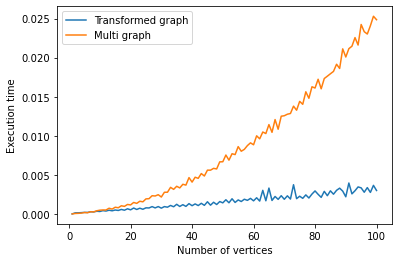

In [62]:
resultTime, nb_vertices = test_nbVertices([fastestPath, fastestPathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_vertices, [resultTimeNormal, resultTimeMulti], "Number of vertices", labels=["Transformed graph", "Multi graph"], title="")

- En fonction du nombre d'arcs

In [63]:
resultTime, nb_arcs = test_nbArcs([fastestPath, fastestPathMG], repeat=10)
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_arcs, [resultTimeNormal, resultTimeMulti], "Number of edges", labels=["Transformed graph", "Multi graph"], title="")

### IV. Plus court chemin
- En fonction du nombre de vertices

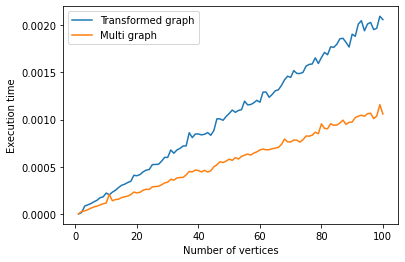

In [ ]:
resultTime, nb_vertices = test_nbVertices([shortestPath, shortestPathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_vertices, [resultTimeNormal, resultTimeMulti], "Number of vertices", labels=["Transformed graph", "Multi graph"], title="")

- En fonction du nombre d'arcs

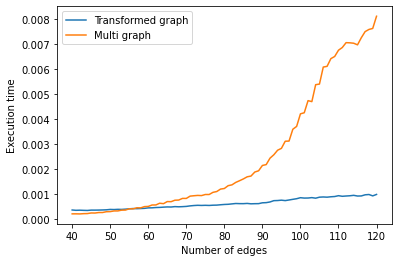

In [ ]:
resultTime, nb_arcs = test_nbArcs([shortestPath, shortestPathMG])
resultTimeNormal, resultTimeMulti = resultTime[0, :], resultTime[1, :]

plot_comparaison(nb_arcs, [resultTimeNormal, resultTimeMulti], "Number of edges", labels=["Transformed graph", "Multi graph"], title="")